Emilio Taggi 1910388 14/01/2023

In [5]:
#include relevant libraries
import numpy as np
import matplotlib.pyplot as plt

In [7]:
#with these we can print variables 'inline'
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# 1.

In [19]:
#data reading
a = float( input(r'Please insert the value of alpha: ') )
b = float(  input(r'Please insert the value of beta: ') )
g = float(  input(r'Please insert the value of gamma: ') ) 
d = float(  input(r'Please insert the value of delta: ') )
R0 = float(  input(r'Please insert the value of R(t=0): ') ) 
F0 = float ( input(r'Please insert the value of F(t=0): ') )

Please insert the value of alpha: 1
Please insert the value of beta: 1
Please insert the value of gamma: 1
Please insert the value of delta: 1
Please insert the value of R(t=0): 10
Please insert the value of F(t=0): 2


In [27]:
T = float ( input(r'Please insert the value of the simulation time T: ') )
dt = float ( input(r'Please insert the value of the sampling time dt: ') )

Please insert the value of the simulation time T: 20
Please insert the value of the sampling time dt: 0.1


In [52]:
from scipy.integrate import odeint
 
# The system of first order ODEs
def odes(u, t):
    R, F = u
    return (a*R-b*R*F, -g*F + d*R*F)

# Sampling times
t = np.arange(0, T, dt)

# Initial values of R and F
u0 = np.array([R0,F0])
 

# Solve the ODEs
u = odeint(odes, u0, t)
R = u[:,0]
F = u[:,1]
dR = ( R[1:] - R[:-1] ) /dt #derivatives
dF = ( F[1:] - F[:-1] ) /dt

In [53]:
#saving to file
fname = 'outfile.txt'
np.savetxt(fname, (t,u[:,0],u[:,1]), delimiter="\t", fmt="%.3f")

# 2.

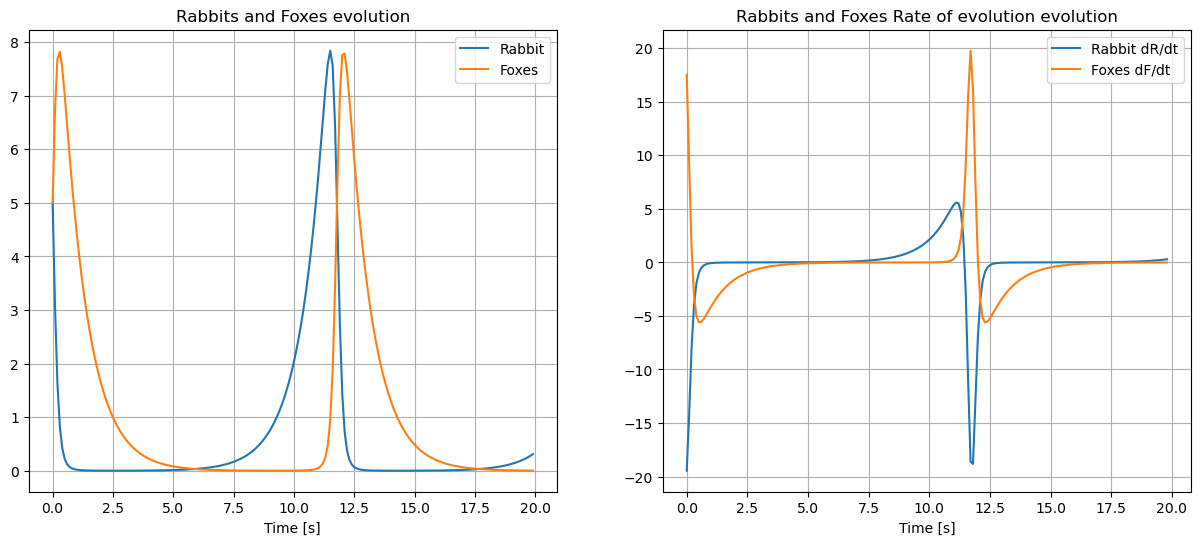

In [76]:
# Plot Rabbit and Foxes vs time
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,6))

ax1.grid()
_  = ax1.plot(t, R, label='Rabbit')
_ = ax1.plot(t, F, label='Foxes')
_ = ax1.set_title('Rabbits and Foxes evolution')
_ = ax1.set_xlabel('Time [s]')
_ = ax1.legend()

ax2.grid()
_  = ax2.plot(t[:-1], dR, label='Rabbit dR/dt')
_ = ax2.plot(t[:-1], dF, label='Foxes dF/dt')
_ = ax2.set_title('Rabbits and Foxes Rate of evolution evolution')
_ = ax2.set_xlabel('Time [s]')
_ = ax2.legend()

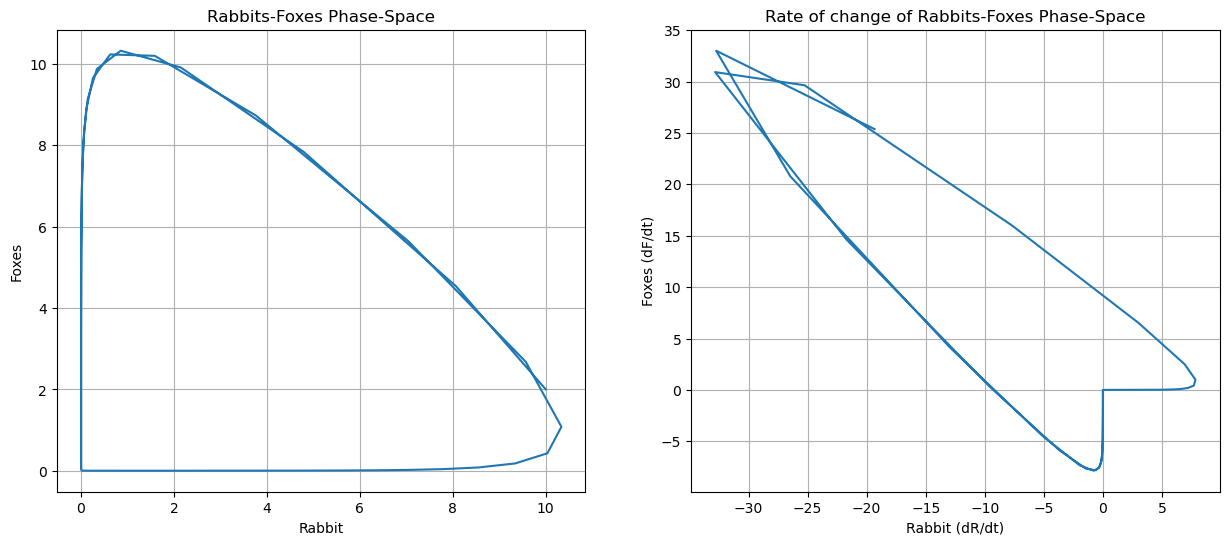

In [63]:
# Plot Rabbit vs Foxes
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,6))

ax1.grid()
_  = ax1.plot(R,F)
_ = ax1.set_title('Rabbits-Foxes Phase-Space')
_ = ax1.set_xlabel('Rabbit')
_ = ax1.set_ylabel('Foxes')

ax2.grid()
_  = ax2.plot(dR,dF)
_ = ax2.set_title('Rate of change of Rabbits-Foxes Phase-Space')
_ = ax2.set_xlabel('Rabbit (dR/dt)')
_ = ax2.set_ylabel('Foxes (dF/dt)')


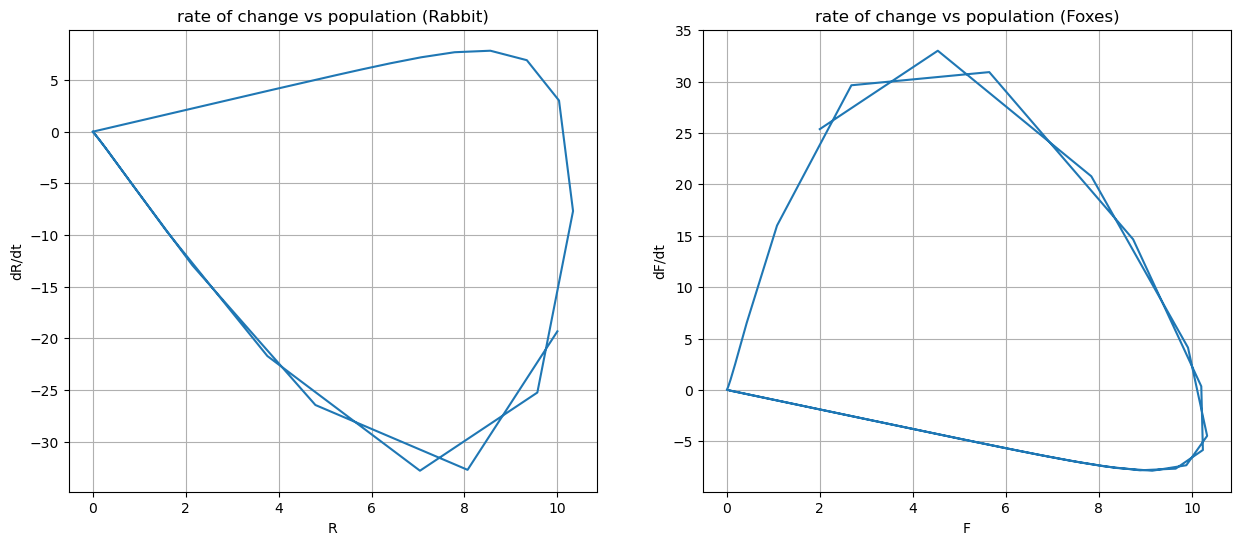

In [65]:
# Plot rate of change vs population
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,6))

ax1.grid()
_  = ax1.plot(R[:-1],dR)
_ = ax1.set_title('rate of change vs population (Rabbit)')
_ = ax1.set_xlabel('R')
_ = ax1.set_ylabel('dR/dt')

ax2.grid()
_  = ax2.plot(F[:-1],dF)
_ = ax2.set_title('rate of change vs population (Foxes)')
_ = ax2.set_xlabel('F')
_ = ax2.set_ylabel('dF/dt')

# 3.

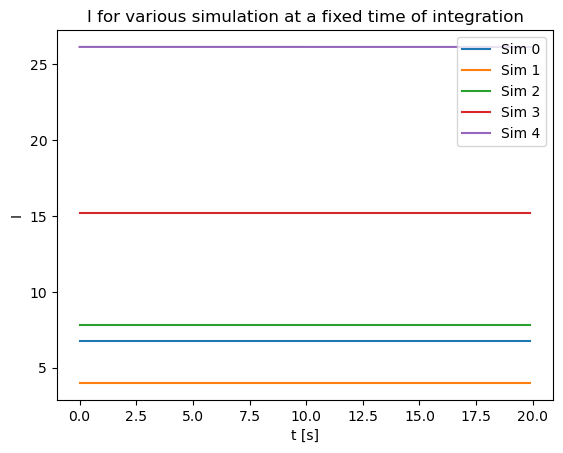

In [79]:
alist = blist = glist = dlist = R0list = F0list = np.arange(1,6)
for i in range(5): #loop over the simulations
    
    # Sampling times
    t = np.arange(0, T, dt)

    # Initial values of R and F
    u0 = np.array([R0,F0])

    #change value of parameter
    a = alist[i]
    b = blist[i]
    g = glist[i]
    d = dlist[i]
    R0 = R0list[i]
    F0 = F0list[i]

    # Solve the ODEs
    u = odeint(odes, u0, t)
    R = u[:,0]
    F = u[:,1]
    dR = ( R[1:] - R[:-1] ) /dt #derivatives
    dF = ( F[1:] - F[:-1] ) /dt
    
    I = d*R - g*np.log(R) + b * F - a * np.log(F)
    
    _ = plt.plot(t,I,label='Sim '+str(i))
    
_ = plt.title("I for various simulation at a fixed time of integration")
_ = plt.legend()
_ = plt.ylabel("I")
_ = plt.xlabel("t [s]")

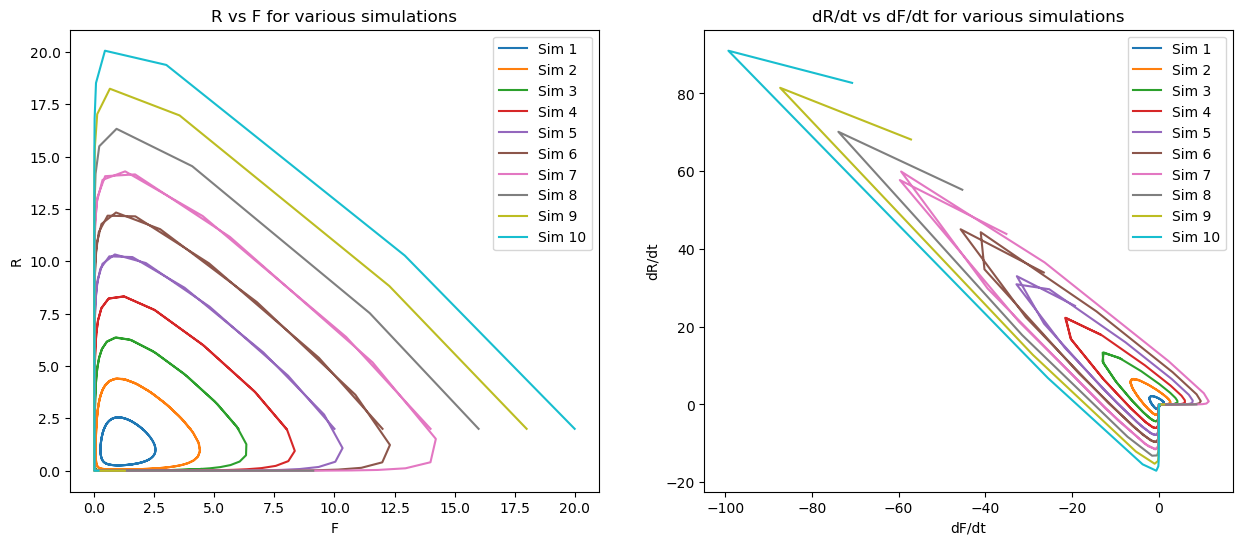

In [85]:
a = b = g = d = 1
F0 = 2

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,6))

for i,R0 in enumerate(range(2,21,2)): #loop over the simulations
    
    # Sampling times
    t = np.arange(0, T, dt)

    # Initial values of R and F
    u0 = np.array([R0,F0])

    

    # Solve the ODEs
    u = odeint(odes, u0, t)
    R = u[:,0]
    F = u[:,1]
    dR = ( R[1:] - R[:-1] ) /dt #derivatives
    dF = ( F[1:] - F[:-1] ) /dt
    
    _ = ax1.plot(R,F,label='Sim '+str(i+1))
    _ = ax2.plot(dR,dF,label='Sim '+str(i+1))
    
_ = ax1.set_title("R vs F for various simulations")
_ = ax1.legend()
_ = ax1.set_ylabel("R")
_ = ax1.set_xlabel("F")

_ = ax2.set_title("dR/dt vs dF/dt for various simulations")
_ = ax2.legend()
_ = ax2.set_ylabel("dR/dt")
_ = ax2.set_xlabel("dF/dt")